In [1]:
# boiler plate to allow running in colab, can ignore if running locally
import subprocess
try:
    import tailnflows
except ModuleNotFoundError:
    # need to build environment
    print('installing tailnflows environment...')
    subprocess.run(['pip', 'install', 'git+https://github.com/Tennessee-Wallaceh/tailnflows'])
    import tailnflows
    from tailnflows.utils import configure_colab_env
    configure_colab_env() # can take a while
    import torch
    torch.set_default_device('cuda')

In [4]:
import torch
import matplotlib.pyplot as plt
from tailnflows.experiments.neural_network_regression.extreme_nn_experiment import run_experiment

In [15]:
activations = {
    'relu': torch.nn.functional.relu,
    'sigmoid': torch.nn.functional.sigmoid,
}

In [16]:
data = {}

In [17]:
from nflows.nn.nets import MLP

dims = [5, 10, 50, 100]
dfs = [1., 2., 30.]

for rep in range(5):
    print(f'repeat __ {rep} __')
    for activation, activation_fcn in activations.items():
        for d in dims:
            for df in dfs:
                mlp = MLP(
                    [d], [1], [20, 20],
                    activation=activation_fcn
                )

                tst_loss, tst_ix = run_experiment(mlp, df, d)
                
                if (d, df, activation) not in data:
                    data[(d, df, activation)] = []

                data[(d, df, activation)].append(tst_loss.detach())

repeat __ 0 __


100%|██████████| 5000/5000 [01:10<00:00, 71.05it/s, loss=0.62 | * 1.05] 


repeat __ 1 __


100%|██████████| 5000/5000 [01:31<00:00, 54.90it/s, loss=0.61 | * 1.07]


repeat __ 2 __


100%|██████████| 5000/5000 [01:37<00:00, 51.10it/s, loss=0.61 | * 1.03] 


repeat __ 3 __


100%|██████████| 5000/5000 [01:56<00:00, 43.09it/s, loss=0.75 | * 1.04] 


repeat __ 4 __


100%|██████████| 5000/5000 [01:31<00:00, 54.35it/s, loss=0.58 | * 1.02] 


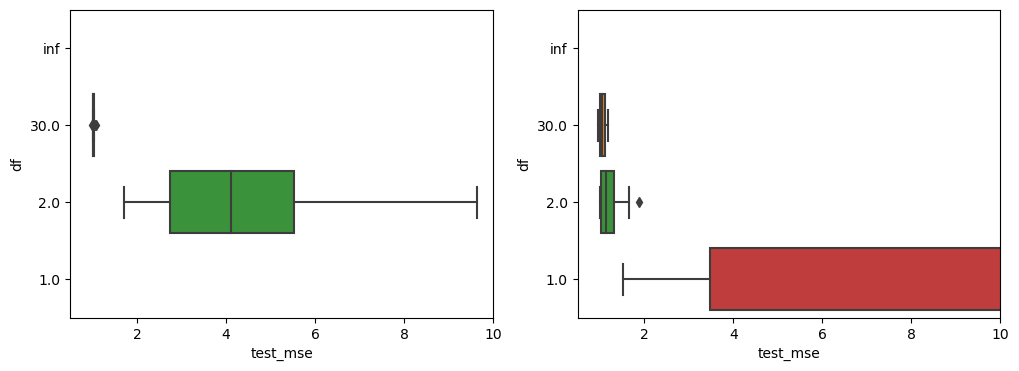

In [19]:
import pandas as pd
import seaborn as sns

row_data = []
for (dim, df, activation), results in data.items():
    for res in results:
        if df == 0.:
          row_data.append({
              'dim': dim,
              'df': 'inf',
              'activation': activation,
              'test_mse': res.numpy(),
          })
        else:
          row_data.append({
              'dim': dim,
              'df': df,
              'activation': activation,
              'test_mse': res.numpy(),
          })


result_dataframe = pd.DataFrame(row_data)
result_dataframe.test_mse = result_dataframe.test_mse.astype(float)
result_dataframe.to_csv('2024-03-20_NN_results_hd20.csv')



In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(
  data=result_dataframe[result_dataframe.activation == 'sigmoid'],
  x='test_mse',
  y='df',
  order=['inf', 30., 2., 1.],
  orient='h',
  ax=axarr[0],
)
sns.boxplot(
  data=result_dataframe[result_dataframe.activation == 'relu'],
  x='test_mse',
  y='df',
  order=['inf', 30., 2., 1.],
  orient='h',
  ax=axarr[1],
)
axarr[0].set_xlim([0.5, 10.])
axarr[1].set_xlim([0.5, 10.])
plt.show()